In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
from qetpy.utils import lowpassfilter 
from qetpy import autocuts
import cdms
#from CDMSDataCatalog import CDMSDataCatalog
import scipy.optimize as optimize
import matplotlib as mpl
import pickle as pkl
import os, sys
import ROOT as rt
import seaborn as sns
import operator as op
import pandas as pd
from collections import Counter

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject
/usr/local/lib/python3.8/dist-packages/CDMSDataCatalog/CDMSDataCatalog.py:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:2868: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('mpl_toolkits')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.8/dist-packages/pkg_resources/__init__.py:2868: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('sphinxcontrib')`.
Implementing implicit namespace packages (as specified in 

Welcome to JupyROOT 6.24/06


In [2]:
base = '/fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2./Submerged'
file_prefix = 'CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2.'


# series = {
#     '7hr' : '23231219_034952',
#     '6hr' : '23231219_110331'
    
# }

# lname = series
# filePath = {}

# for key in series.keys():
    
#     filePath[key] = '%s/Prompt_V04-15_P0.2.1_%s.root'%(base,series[key])
#     if(os.path.exists(filePath[key])):
#         print(key,' : ',filePath[key])
#     else:
#         print('not found: ',filePath[key])


        

# series = ['23231221_015705','23231220_190923','23231220_122140','23231220_053358','23231220_012745',
#          '23231219_184002','23231219_110331','23231219_034952','23231218_223530','23231218_190035',
#          '23231218_152721','23231218_093255','23231217_212512','23231217_171613','23231217_135018']
# last series is corrupted

# series = ['23231221_015705','23231220_190923','23231220_122140','23231220_053358','23231220_012745',
#          '23231219_184002','23231219_110331','23231219_034952','23231218_223530','23231218_190035',
#          '23231218_152721','23231218_093255','23231217_212512','23231217_171613']

# #Found series in reprocessed data
series = ['23231220_012745', '23231219_184002', '23231219_110331', '23231219_034952', 
          '23231218_223530', '23231218_190035', '23231218_152721', '23231217_212512']
filePath = []

for ser in series:
    
    fp = '%s/%s_%s.root'%(base,file_prefix,ser)
    if(os.path.exists(fp)):
        print(ser,' : ',fp)
        filePath.append(fp)
    else:
        print('not found: ',fp)

23231220_012745  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2._23231220_012745.root
23231219_184002  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2._23231219_184002.root
23231219_110331  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2._23231219_110331.root
23231219_034952  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2._23231219_034952.root
23231218_223530  :  /fs/ddn/sdf/group/supercdms/data/CDMS/CUTE/R37/Processed/Tests/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2./Submerged/CUTE_T3_GeActivation_v1.0.0_V05-00_P0.2._23231218_223530.root
23231218_190035  :  

In [3]:
# Get trees from RQ file

# RQ=[]
# for i,key in enumerate(series.keys()):
#     RQ.append(uproot.open(filePath[key])['rqDir/zip1']) 

# eventTree=[]
# for i,key in enumerate(series.keys()):
#     eventTree.append(uproot.open(filePath[key])['rqDir/eventTree']) 
    
RQ=[]
for i,ser in enumerate(series):
    RQ.append(uproot.open(filePath[i])['rqDir/zip1']) 

eventTree=[]
for i,ser in enumerate(series):
    eventTree.append(uproot.open(filePath[i])['rqDir/eventTree']) 
    
    
print('Done!')


Done!


In [4]:
#Load RQs from processed files
channels=['PT','PAS1','PBS1','PCS1','PDS1','PES1','PFS1','PAS2','PBS2','PCS2','PDS2','PES2','PFS2']

OFchiq={}
OFamps={}
OFdelay={}
OFamps0={}
OFnorms={}
OFbs={}
WKr20 = {}
WKr40 = {}
WKr60 = {}
WKr80 = {}
WKr90 = {}
# for i,key in enumerate(series.keys()):
#     tc={}
#     ta={}
#     td={}
#     ta0={}
#     tn = {}
#     tbs = {}
#     for c in channels:
#         tc[c]=(RQ[i].array(c+"OFchisq"))
#         ta[c]=(RQ[i].array(c+"OFamps"))
#         ta0[c]=(RQ[i].array(c+"OFamps0"))
#         td[c]=(RQ[i].array(c+"OFdelay"))
#         if(c!='PT'):
#             tn[c] = (RQ[i].array(c+"norm"))
#             tbs[c] = (RQ[i].array(c+"bs"))
#     OFchiq[series[key]]=tc
#     OFamps[series[key]]=ta
#     OFamps0[series[key]]=ta0
#     OFdelay[series[key]]=td
#     OFnorms[series[key]]=tn
#     OFbs[series[key]]=tbs
    
for i,key in enumerate(series):
    tc={}
    ta={}
    td={}
    ta0={}
    tn = {}
    tbs = {}
    tr20 = {}
    tr40 = {}
    tr60 = {}
    tr80 = {}
    tr90 = {}
    for c in channels:
        tc[c]=(RQ[i][c+"OFchisq"].array(library="np"))
        ta[c]=(RQ[i][c+"OFamps"].array(library="np"))
        ta0[c]=(RQ[i][c+"OFamps0"].array(library="np"))
        td[c]=(RQ[i][c+"OFdelay"].array(library="np"))
        tr20[c]=(RQ[i][c+"WKr20"].array(library="np"))
        tr40[c]=(RQ[i][c+"WKr40"].array(library="np"))
        tr60[c]=(RQ[i][c+"WKr60"].array(library="np"))
        tr80[c]=(RQ[i][c+"WKr80"].array(library="np"))
        tr90[c]=(RQ[i][c+"WKr90"].array(library="np"))
        
        # tc[c]=(RQ[i].array(c+"OFchisq"))
        # ta[c]=(RQ[i].array(c+"OFamps"))
        # ta0[c]=(RQ[i].array(c+"OFamps0"))
        # td[c]=(RQ[i].array(c+"OFdelay"))
        # tr20[c] = (RQ[i].array(c+"WKr20"))
        # tr40[c] = (RQ[i].array(c+"WKr40"))
        # tr60[c] = (RQ[i].array(c+"WKr60"))
        # tr80[c] = (RQ[i].array(c+"WKr80"))
        # tr90[c] = (RQ[i].array(c+"WKr90"))
        if(c!='PT'):
            tn[c] = (RQ[i][c+"norm"].array(library="np"))
            tbs[c] = (RQ[i][c+"bs"].array(library="np"))
            # tn[c] = (RQ[i].array(c+"norm"))
            # tbs[c] = (RQ[i].array(c+"bs"))
    OFchiq[key]=tc
    OFamps[key]=ta
    OFamps0[key]=ta0
    OFdelay[key]=td
    OFnorms[key]=tn
    OFbs[key]=tbs
    WKr20[key]=tr20
    WKr40[key]=tr40
    WKr60[key]=tr60
    WKr80[key]=tr80
    WKr90[key]=tr90
    print('%s loaded'%(key))
    
Wk = {}
Wk['r20'] = WKr20
Wk['r40'] = WKr40
Wk['r60'] = WKr60
Wk['r80'] = WKr80
Wk['r90'] = WKr90        
print('Done!')

23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231217_212512 loaded
Done!


In [5]:
# calculate max amplitude & min delay for a given side
max_amp = {}
min_delay = {}
for idx, key in enumerate(series):
    tmax_amp = []
    tmin_del = []
    for eid in range(len(OFamps[key]['PT'])):
        t1 = []
        t2 = []
        for c in channels:
            if(c == 'PT'):
                continue
            t1.append(OFamps[key][c][eid])
            t2.append(OFdelay[key][c][eid])
        tmax = np.max(t1)
        tmaxarg = np.argmax(t1)
        tmin = np.min(t2)
        tminarg = np.argmin(t2)
        cmax = 'none'
        cmin = 'none'
        if(tmax > -999999.0):
            cmax = channels[tmaxarg + 1]
            cmin = channels[tminarg + 1]
        tmax_amp.append(cmax)
        tmin_del.append(cmin)
    max_amp[key] = np.array(tmax_amp)
    min_delay[key] = np.array(tmin_del)
    print('%s loaded'%(key))
print('done!')       

23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231217_212512 loaded
done!


In [6]:
calib = {}
#----- my calibration -------
# calib['PAS1'] = 0.85*1.4
# calib['PBS1'] = 0.8*1.4
# calib['PCS1'] = 0.75*1.4
# calib['PDS1'] = 0.85*1.4
# calib['PES1'] = 0.9*1.4
# calib['PFS1'] = 0.65*1.4

# calib['PAS2'] = 1.3
# calib['PBS2'] = 1.2
# calib['PCS2'] = 0.85
# calib['PDS2'] = 1.2
# calib['PES2'] = 1.1
# calib['PFS2'] = 0.9

# calib_my = {
#     'PAS1' : 1.3,
#     'PBS1' : 1.0,
#     'PCS1' : 1.0,
#     'PDS1' : 1.0,
#     'PES1' : 1.0,
#     'PFS1' : 1.0,
#     'PAS2' : 1.3,
#     'PBS2' : 1.15,
#     'PCS2' : 1.0,
#     'PDS2' : 1.15,
#     'PES2' : 1.2,
#     'PFS2' : 1.0
# }
# reweight = 1.12


### My new calib after renormalization ####
calib_my = {
    'PAS1' : 1.4779, 
    'PBS1' : 0.9182, 
    'PCS1' : 0.8745, 
    'PDS1' : 1.0057, 
    'PES1' : 0.8308, 
    'PFS1' : 0.6996, 
    'PAS2' : 1.3755, 
    'PBS2' : 1.0321, 
    'PCS2' : 0.7297, 
    'PDS2' : 1.2756, 
    'PES2' : 1.0508, 
    'PFS2' : 0.7297
}
reweight = 1.0

# calib_official = {
#     'PAS1' : 1.1849,
#     'PBS1' : 0.9570,
#     'PCS1' : 0.9115,
#     'PDS1' : 1.0482,
#     'PES1' : 0.8659,
#     'PFS1' : 0.7292,
#     'PAS2' : 1.2351,
#     'PBS2' : 1.0477,
#     'PCS2' : 0.8518,
#     'PDS2' : 1.2948,
#     'PES2' : 1.0222,
#     'PFS2' : 0.8518
# }
# reweight = 1.0



calib = {}
for c in channels:
    if(c == 'PT'):
        continue
    calib[c] = calib_my[c]
    if('S1' in c):
        calib[c] *= reweight

# for c in channels:
#     if('S1' in c):
#         calib[c] *= s1_scale

In [20]:

asym_par = {}
asym_par_corr = {}
asym_par_reduced_corr = {}
asym_par_reduced = {}


redu_z_AB_AB = {}
redu_z_AB_PT = {}
redu_z_A_A = {}
redu_z_A_PT = {}



OFamps_corr = {}
Psum = {}
Psum_corr = {}

for idx, key in enumerate(series):
    temp = {}
    A1_def = OFamps[key]['PAS1']
    B1_def = OFamps[key]['PBS1']
    C1_def = OFamps[key]['PCS1']
    D1_def = OFamps[key]['PDS1']
    E1_def = OFamps[key]['PES1']
    F1_def = OFamps[key]['PFS1']

    A2_def = OFamps[key]['PAS2']
    B2_def = OFamps[key]['PBS2']
    C2_def = OFamps[key]['PCS2']
    D2_def = OFamps[key]['PDS2']
    E2_def = OFamps[key]['PES2']
    F2_def = OFamps[key]['PFS2']
    
    A1 = calib['PAS1']*A1_def
    B1 = calib['PBS1']*B1_def
    C1 = calib['PCS1']*C1_def
    D1 = calib['PDS1']*D1_def
    E1 = calib['PES1']*E1_def
    F1 = calib['PFS1']*F1_def
    
    A2 = calib['PAS2']*A2_def
    B2 = calib['PBS2']*B2_def
    C2 = calib['PCS2']*C2_def
    D2 = calib['PDS2']*D2_def
    E2 = calib['PES2']*E2_def
    F2 = calib['PFS2']*F2_def
    temp['PAS1'] = A1
    temp['PBS1'] = B1
    temp['PCS1'] = C1
    temp['PDS1'] = D1
    temp['PES1'] = E1
    temp['PFS1'] = F1
    
    temp['PAS2'] = A2
    temp['PBS2'] = B2
    temp['PCS2'] = C2
    temp['PDS2'] = D2
    temp['PES2'] = E2
    temp['PFS2'] = F2
    OFamps_corr[key] = temp
    
    
    s1 = A1_def + B1_def + C1_def + D1_def + E1_def + F1_def
    s2 = A2_def + B2_def + C2_def + D2_def + E2_def + F2_def
    asym_par[key] = (s1 - s2)/(s1 + s2)
    Psum[key] =  s1+s2
    s1 = A1_def + B1_def
    s2 = A2_def + B2_def
    asym_par_reduced[key] = (s1-s2)/(s1+s2)
    
    redu_z_AB_AB[key] = asym_par_reduced[key]
    nume = (A1_def + B1_def) - (A2_def + B2_def)
    denom = Psum[key]
    redu_z_AB_PT[key] = nume/denom
    
    nume = (A1_def) - (A2_def)
    denom = (A1_def) + (A2_def)
    redu_z_A_A[key] = nume/denom
    
    nume = (A1_def) - (A2_def)
    denom = Psum[key]
    redu_z_A_PT[key] = nume/denom
    
    s1 = A1 + B1
    s2 = A2 + B2
    
    s1 = A1 + B1 + C1 + D1 + E1 + F1
    #s1 = s1*1.14
    s2 = A2 + B2 + C2 + D2 + E2 + F2
    
    asym_par_corr[key] = (s1 - s2)/(s1 + s2)
    
    Psum_corr[key] = s1+s2 
    s1 = A1 + B1
    s2 = A2 + B2
    asym_par_reduced_corr[key] = (s1-s2)/(s1+s2)

    
    
    print('%s done'%(key))

23231220_012745 done
23231219_184002 done
23231219_110331 done
23231219_034952 done
23231218_223530 done
23231218_190035 done
23231218_152721 done
23231217_212512 done


In [55]:
max_amp[key]

array(['none', 'PCS1', 'PCS1', ..., 'none', 'none', 'none'], dtype='<U4')

In [8]:
# Get event info from processed files

TriggerTime=[]
TriggerType=[]
EventNumber=[]
TrigDet=[]
TriggerMask=[]
EventTime=[]
# for i,key in enumerate(series.keys()):
#     TriggerTime.append(eventTree[i].array("TriggerTime"))
#     TriggerType.append(eventTree[i].array("TriggerType"))
#     EventNumber.append(eventTree[i].array("EventNumber"))
#     TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
#     TriggerMask.append(eventTree[i].array("TriggerMask"))
#     EventTime.append(eventTree[i].array("EventTime"))

R2 = {} # Radial parameter for S2
R1 = {} # Radial parameter for S1
amp_diff_s1 = {}  
amp_diff_s2 = {}  
amp_diff_abs = {}
amp_diff_corr = {}  
amp_diff_abs_corr = {}

for i,key in enumerate(series):
    TriggerTime.append(eventTree[i]["TriggerTime"].array(library="np"))
    TriggerType.append(eventTree[i]["TriggerType"].array(library="np"))
    EventNumber.append(eventTree[i]["EventNumber"].array(library="np"))
    TrigDet.append(eventTree[i]["TriggerDetectorNum"].array(library="np"))
    TriggerMask.append(eventTree[i]["TriggerMask"].array(library="np"))
    EventTime.append(eventTree[i]["EventTime"].array(library="np"))
    
    # TriggerTime.append(eventTree[i].array("TriggerTime"))
    # TriggerType.append(eventTree[i].array("TriggerType"))
    # EventNumber.append(eventTree[i].array("EventNumber"))
    # TrigDet.append(eventTree[i].array("TriggerDetectorNum"))
    # TriggerMask.append(eventTree[i].array("TriggerMask"))
    # EventTime.append(eventTree[i].array("EventTime"))
    
    R2[key] = OFdelay[key]['PFS2'] - OFdelay[key]['PAS2']
    R1[key] = OFdelay[key]['PFS1'] - OFdelay[key]['PAS1']
    amp_diff_s2[key] = (OFamps[key]['PFS2'] - OFamps[key]['PAS2'])/(OFamps[key]['PFS2'] + OFamps[key]['PAS2'])
    amp_diff_s1[key] = (OFamps[key]['PFS1'] - OFamps[key]['PAS1'])/(OFamps[key]['PFS1'] + OFamps[key]['PAS1'])
    amp_diff_abs[key] = (OFamps[key]['PFS2'] - OFamps[key]['PAS2'])
    amp_diff_corr[key] = (OFamps_corr[key]['PFS2'] - OFamps_corr[key]['PAS2'])/(OFamps_corr[key]['PFS2'] + OFamps_corr[key]['PAS2'])
    amp_diff_abs_corr[key] = (OFamps_corr[key]['PFS2'] - OFamps_corr[key]['PAS2'])
    print('%s loaded'%(key))
print('Done!')

23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231217_212512 loaded
Done!


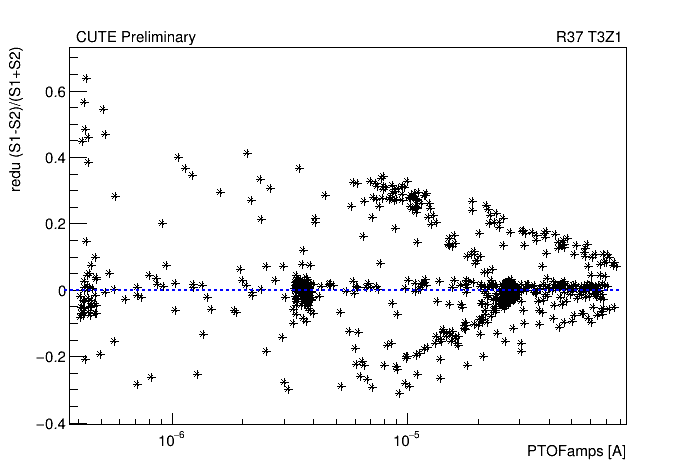

In [9]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

#gr.GetYaxis().SetRangeUser(-0.2,0.2)

l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
# can.SetGridx()
# can.SetGridy()
can.Draw()

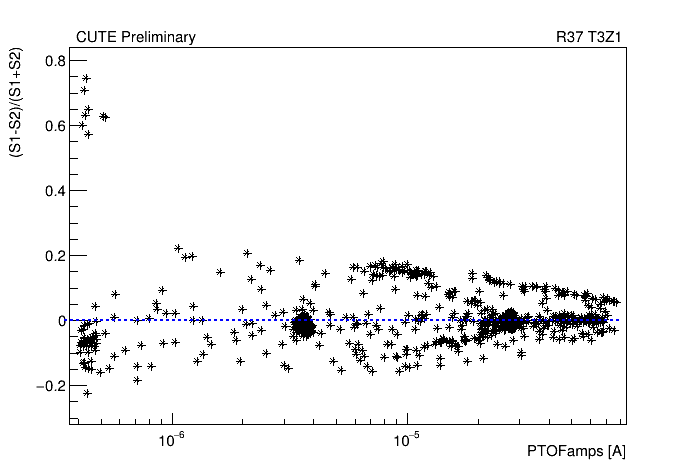

In [9]:
chan = 'PT'
x = np.array([])
y = np.array([])
#temp = redu_z_A_A
temp = asym_par
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('(S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

#gr.GetYaxis().SetRangeUser(-0.2,0.2)

l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
# can.SetGridx()
# can.SetGridy()
can.Draw()

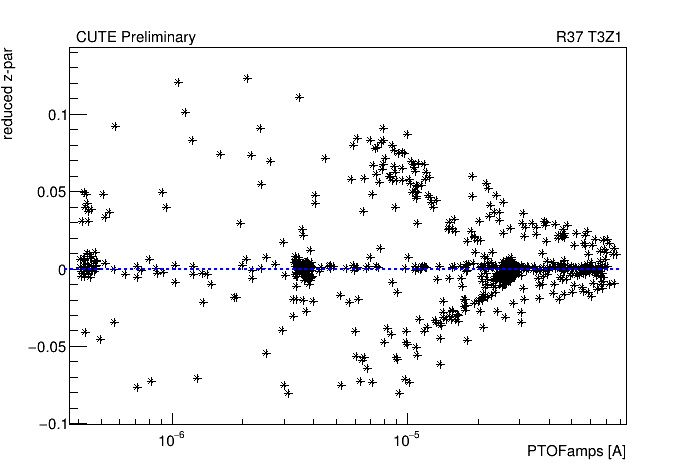

In [25]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = redu_z_A_PT
#temp = asym_par
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('reduced z-par')

gr.Draw('AP*')

can.SetLogx()

#gr.GetYaxis().SetRangeUser(-0.2,0.2)

l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')

#textOnTop.DrawLatexNDC(0.2,0.8,'#bf{ y_axis = {(PAS1 + PBS1) - (PAS2 + PBS2)}/{(PAS1 + PBS1) - (PAS2 + PBS2)} }')
# can.SetGridx()
# can.SetGridy()
can.Draw()

In [10]:
idx = 0
key = series[idx]

max_amp[key]

array(['none', 'PCS1', 'none', ..., 'none', 'none', 'none'], dtype='<U4')

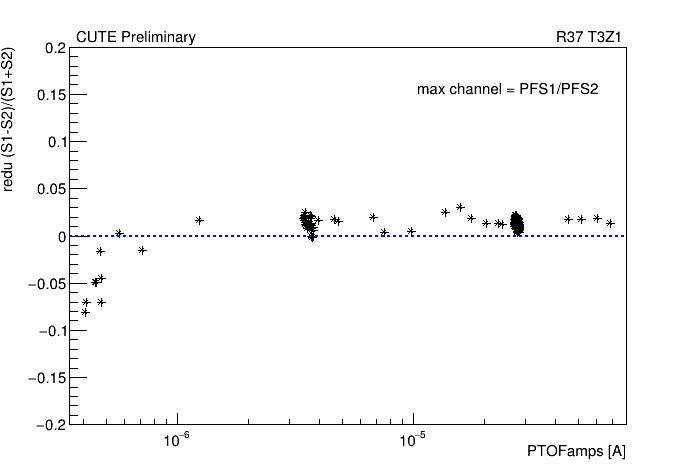

In [12]:
'''
    With Max channel cut
'''
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
maxc = 'PF'
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & ((max_amp[key] == '%sS1'%(maxc)) | (max_amp[key] == '%sS2'%(maxc)))
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

gr.GetYaxis().SetRangeUser(-0.2,0.2)
gr.GetXaxis().SetLimits(0.35e-6,8e-5)

l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
textOnTop.DrawLatexNDC(0.6,0.8,'#bf{max channel = %sS1/%sS2}'%(maxc,maxc))
# can.SetGridx()
# can.SetGridy()
can.Draw()

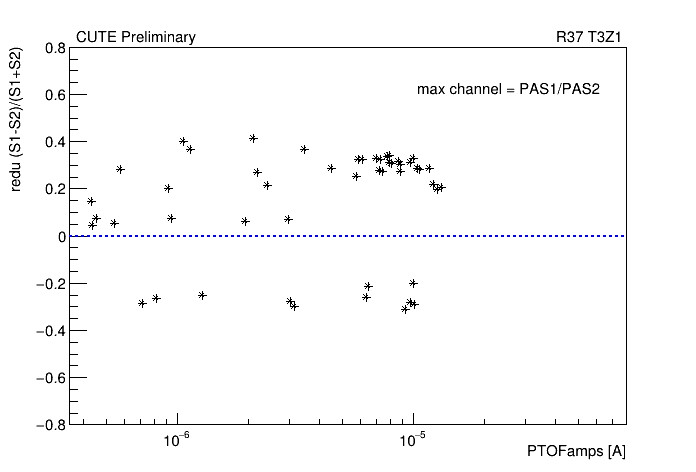

In [13]:
'''
    With Max channel cut
'''
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
maxc = 'PA'
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & ((max_amp[key] == '%sS1'%(maxc)) | (max_amp[key] == '%sS2'%(maxc)))
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

gr.GetYaxis().SetRangeUser(-0.8,0.8)
gr.GetXaxis().SetLimits(0.35e-6,8e-5)
l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
textOnTop.DrawLatexNDC(0.6,0.8,'#bf{max channel = %sS1/%sS2}'%(maxc,maxc))

# can.SetGridx()
# can.SetGridy()
can.Draw()

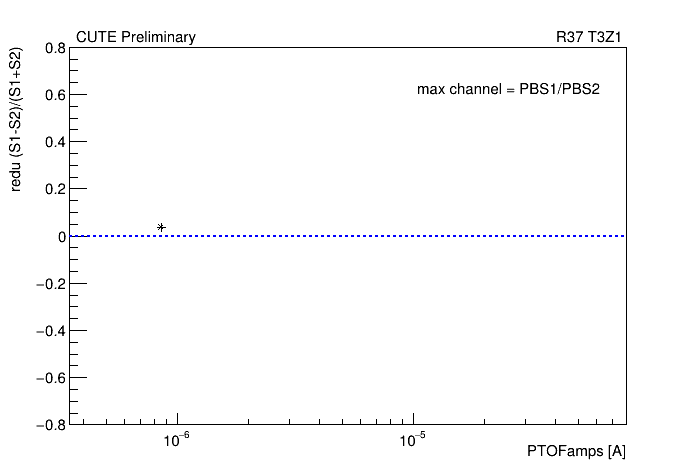

In [17]:
'''
    With Max channel cut
'''
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
maxc = 'PB'
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & ((max_amp[key] == '%sS1'%(maxc)) | (max_amp[key] == '%sS2'%(maxc)))
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

gr.GetYaxis().SetRangeUser(-0.8,0.8)
gr.GetXaxis().SetLimits(0.35e-6,8e-5)
l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
textOnTop.DrawLatexNDC(0.6,0.8,'#bf{max channel = %sS1/%sS2}'%(maxc,maxc))

# can.SetGridx()
# can.SetGridy()
can.Draw()

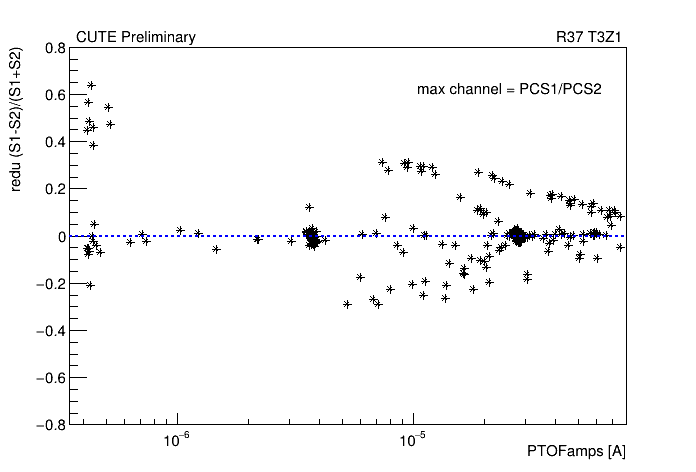

In [14]:
'''
    With Max channel cut
'''
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
maxc = 'PC'
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & ((max_amp[key] == '%sS1'%(maxc)) | (max_amp[key] == '%sS2'%(maxc)))
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

gr.GetYaxis().SetRangeUser(-0.8,0.8)
gr.GetXaxis().SetLimits(0.35e-6,8e-5)
l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
textOnTop.DrawLatexNDC(0.6,0.8,'#bf{max channel = %sS1/%sS2}'%(maxc,maxc))

# can.SetGridx()
# can.SetGridy()
can.Draw()

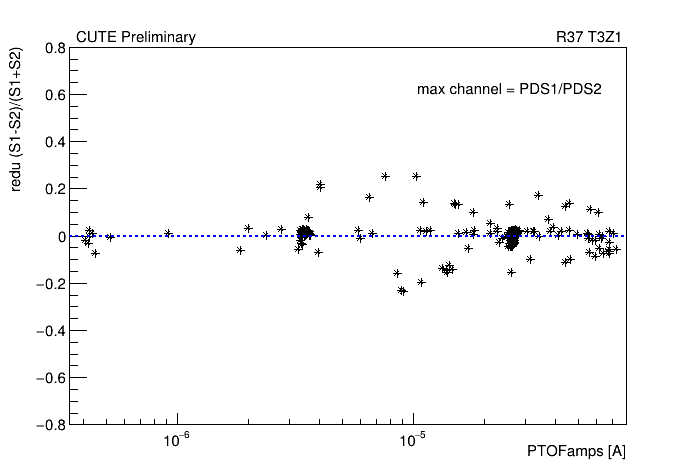

In [15]:
'''
    With Max channel cut
'''
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
maxc = 'PD'
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & ((max_amp[key] == '%sS1'%(maxc)) | (max_amp[key] == '%sS2'%(maxc)))
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

gr.GetYaxis().SetRangeUser(-0.8,0.8)
gr.GetXaxis().SetLimits(0.35e-6,8e-5)
l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
textOnTop.DrawLatexNDC(0.6,0.8,'#bf{max channel = %sS1/%sS2}'%(maxc,maxc))

# can.SetGridx()
# can.SetGridy()
can.Draw()

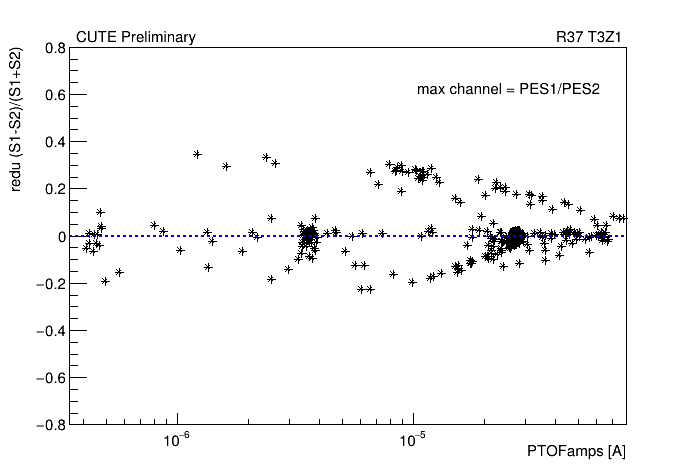

In [16]:
'''
    With Max channel cut
'''
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
maxc = 'PE'
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & ((max_amp[key] == '%sS1'%(maxc)) | (max_amp[key] == '%sS2'%(maxc)))
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

gr.GetYaxis().SetRangeUser(-0.8,0.8)
gr.GetXaxis().SetLimits(0.35e-6,8e-5)
l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
textOnTop.DrawLatexNDC(0.6,0.8,'#bf{max channel = %sS1/%sS2}'%(maxc,maxc))

# can.SetGridx()
# can.SetGridy()
can.Draw()

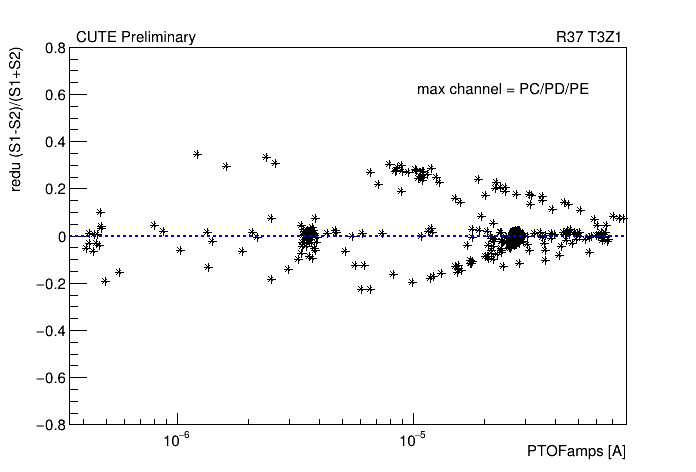

In [42]:
'''
    With Max channel cut
'''
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
maxc = 'PA'
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & ( (max_amp[key] == 'PES1') | (max_amp[key] == 'PES2') )
                   # | (max_amp[key] == 'PDS1') | (max_amp[key] == 'PDS2') 
                   # | (max_amp[key] == 'PES1') | (max_amp[key] == 'PES2') )
    x = np.append(x,temp[key][mask])
    y = np.append(y,OFamps[key][chan][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(y),(x))
gr.GetXaxis().SetTitle('PTOFamps [A]')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetYaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

can.SetLogx()

gr.GetYaxis().SetRangeUser(-0.8,0.8)
gr.GetXaxis().SetLimits(0.35e-6,8e-5)
l0 = rt.TLine(0.35e-6,0,8e-5,0)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
textOnTop.DrawLatexNDC(0.6,0.8,'#bf{max channel = PC/PD/PE}')
# can.SetGridx()
# can.SetGridy()
can.Draw()

In [15]:
def check_region(ptofamp, redu_z):
    if(ptofamp >= 0.5e-6 and ptofamp <= 0.8e-6):
        if(abs(redu_z) < 0.1):
            return 1
        else:
            return 2
    elif(ptofamp >= 2e-6 and ptofamp <= 5e-6):
        if(abs(redu_z) < 0.1):
            return 3
        else:
            return 4
    elif(ptofamp >= 24e-6 and ptofamp <= 32e-6):
        if(abs(redu_z) < 0.1):
            return 5
        else:
            return 6
    elif(ptofamp >= 8e-6 and ptofamp <= 20e-6):
        if(abs(redu_z) < 0.1):
            return 7
        else:
            return 8
    else:
        -1

In [16]:
def max_channel(max_, wk, side=1, draw=False):
    chan = 'PT'
    x = np.array([])
    y = np.array([])

    tarc = 'PAS%d'%(side)
    refc = 'PFS%d'%(side)
    
    max_ch = max_
    temp = Wk[wk]
    histname = 'Wk%sdiff (A%d-F%d) %s max'%(wk, side, side, max_)
    h_temp = rt.TH1F('h_temp',histname,100,-0.0002,0.0002)

    for idx,key in enumerate(series):
        mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
        of = OFamps[key][chan][mask]
        reduz = asym_par_reduced[key][mask]
        maxc = max_amp[key][mask]
        wkdiff = temp[key][tarc][mask] - temp[key][refc][mask]
        for i in range(len(of)):
            if(maxc[i] != max_):
                continue
            h_temp.Fill(wkdiff[i])
    h_temp.SetTitle('%s'%(histname))
    h_temp.GetXaxis().SetTitle(histname)
    if(draw):
        can = rt.TCanvas()
        h_temp.Draw()


        textOnTop = rt.TLatex()
        textOnTop.SetTextSize(0.035)
        textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
        textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
        can.SetGridx()
        can.SetGridy()

        can.Draw()
    return h_temp
        

In [20]:
def max_channel_asym_cut(max_, wk, side=1, draw=False):
    chan = 'PT'
    x = np.array([])
    y = np.array([])

    tarc = 'PAS%d'%(side)
    refc = 'PFS%d'%(side)
    
    max_ch = max_
    temp = Wk[wk]
    histname = 'Wk%sdiff (A%d-F%d) %s max'%(wk, side, side, max_)
    h_temp = rt.TH1F('h_temp',histname,100,-0.0002,0.0002)

    for idx,key in enumerate(series):
        mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
        mask = mask & (abs(asym_par_reduced[key]) < 0.1)
        of = OFamps[key][chan][mask]
        reduz = asym_par_reduced[key][mask]
        maxc = max_amp[key][mask]
        wkdiff = temp[key][tarc][mask] - temp[key][refc][mask]
        for i in range(len(of)):
            if(maxc[i] != max_):
                continue
            h_temp.Fill(wkdiff[i])
    h_temp.SetTitle('%s'%(histname))
    h_temp.GetXaxis().SetTitle(histname)
    if(draw):
        can = rt.TCanvas()
        h_temp.Draw()


        textOnTop = rt.TLatex()
        textOnTop.SetTextSize(0.035)
        textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
        textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
        can.SetGridx()
        can.SetGridy()

        can.Draw()
    return h_temp
        

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


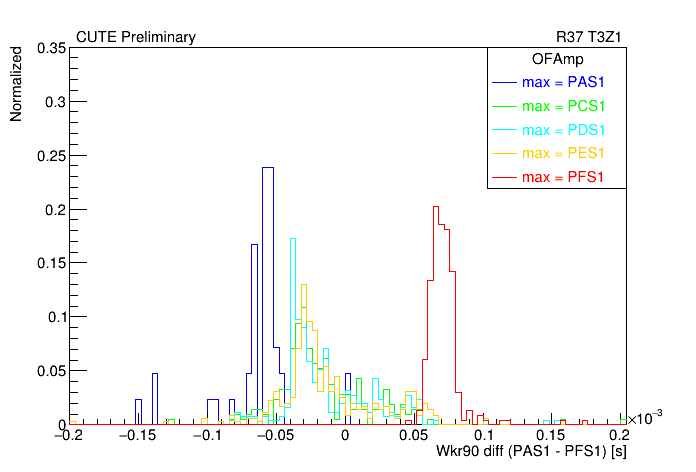

In [107]:
hists = []
wr = 'r90'
side = 1
hists.append(max_channel('PAS1',wr,side=side))
# #hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS1',wr,side=side))
hists.append(max_channel('PDS1',wr,side=side))
hists.append(max_channel('PES1',wr,side=side))
hists.append(max_channel('PFS1',wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.GetXaxis().SetRangeUser(-0.2e-3, 0.2e-3)
    hist.GetYaxis().SetRangeUser(0,0.35)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


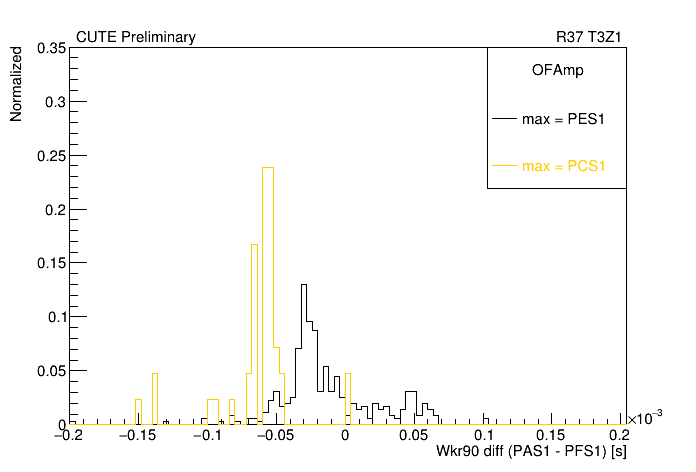

In [106]:
hists = []
wr = 'r90'
side = 1
hists.append(max_channel('PES1',wr,side=side))
hists.append(max_channel('PAS1',wr,side=side))
# #hists.append(max_channel('PBS1','r40'))

#line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_color = [rt.kBlack, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
#ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
ltext = ['max = PES%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.GetXaxis().SetRangeUser(-0.2e-3, 0.2e-3)
    hist.GetYaxis().SetRangeUser(0,0.35)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


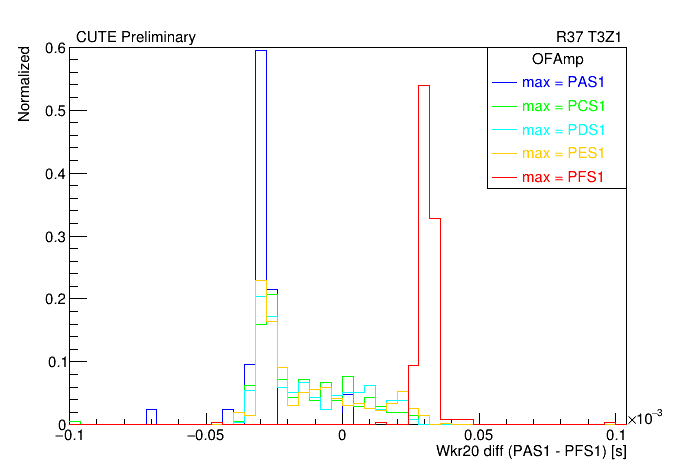

In [14]:
hists = []
wr = 'r20'
side = 1
hists.append(max_channel('PAS1',wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS1',wr,side=side))
hists.append(max_channel('PDS1',wr,side=side))
hists.append(max_channel('PES1',wr,side=side))
hists.append(max_channel('PFS1',wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.GetXaxis().SetRangeUser(-0.1e-3, 0.1e-3)
    hist.GetYaxis().SetRangeUser(0,0.6)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


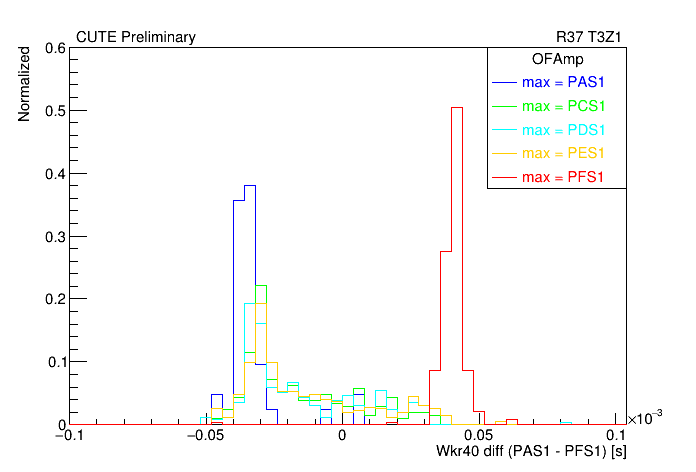

In [15]:
hists = []
wr = 'r40'
side = 1
hists.append(max_channel('PAS1',wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS1',wr,side=side))
hists.append(max_channel('PDS1',wr,side=side))
hists.append(max_channel('PES1',wr,side=side))
hists.append(max_channel('PFS1',wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.GetXaxis().SetRangeUser(-0.1e-3, 0.1e-3)
    hist.GetYaxis().SetRangeUser(0,0.6)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


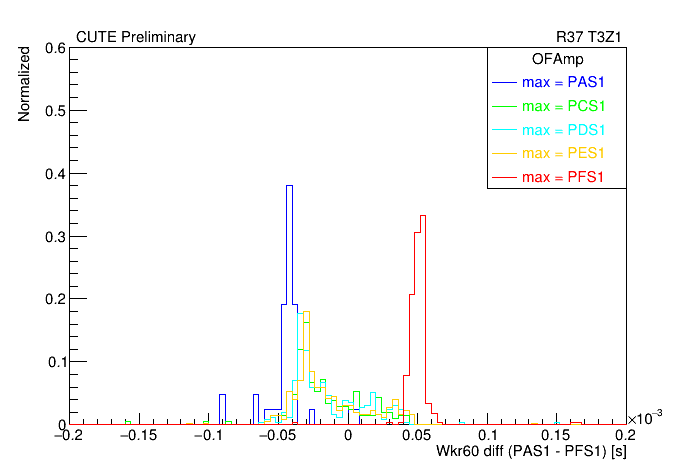

In [109]:
hists = []
wr = 'r60'
side = 1
hists.append(max_channel('PAS1',wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS1',wr,side=side))
hists.append(max_channel('PDS1',wr,side=side))
hists.append(max_channel('PES1',wr,side=side))
hists.append(max_channel('PFS1',wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    #hist.GetXaxis().SetRangeUser(-0.1e-3, 0.1e-3)
    hist.GetYaxis().SetRangeUser(0,0.6)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


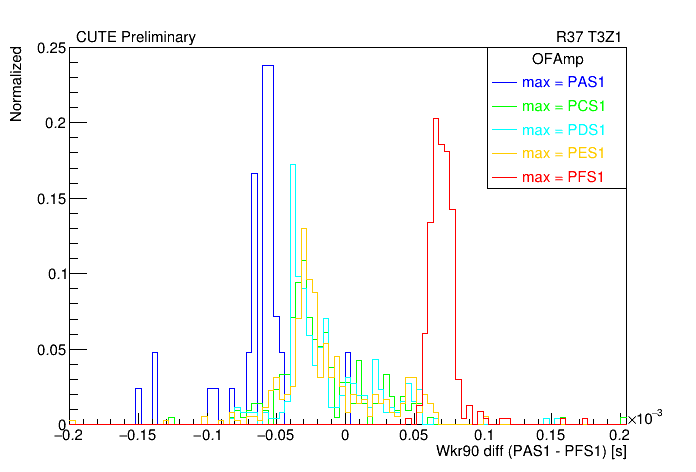

In [102]:
hists = []
wr = 'r90'
side = 1
hists.append(max_channel('PAS1',wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS1',wr,side=side))
hists.append(max_channel('PDS1',wr,side=side))
hists.append(max_channel('PES1',wr,side=side))
hists.append(max_channel('PFS1',wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.GetXaxis().SetRangeUser(-0.2e-3, 0.2e-3)
    #hist.GetYaxis().SetRangeUser(0,0.35)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


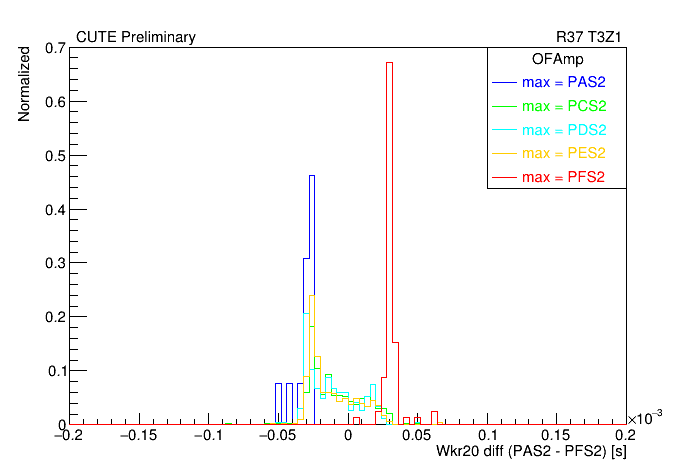

In [103]:
hists = []
wr = 'r20'
side = 2
hists.append(max_channel('PAS%d'%(side),wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS%d'%(side),wr,side=side))
hists.append(max_channel('PDS%d'%(side),wr,side=side))
hists.append(max_channel('PES%d'%(side),wr,side=side))
hists.append(max_channel('PFS%d'%(side),wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    #hist.GetXaxis().SetRangeUser(-0.1e-3, 0.1e-3)
    hist.GetYaxis().SetRangeUser(0,0.7)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


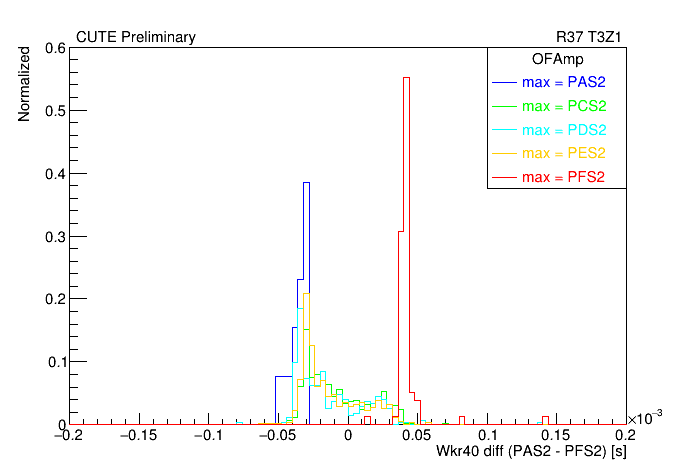

In [22]:
hists = []
wr = 'r40'
side = 2
hists.append(max_channel('PAS%d'%(side),wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS%d'%(side),wr,side=side))
hists.append(max_channel('PDS%d'%(side),wr,side=side))
hists.append(max_channel('PES%d'%(side),wr,side=side))
hists.append(max_channel('PFS%d'%(side),wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    #hist.GetXaxis().SetRangeUser(-0.1e-3, 0.1e-3)
    hist.GetYaxis().SetRangeUser(0,0.6)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


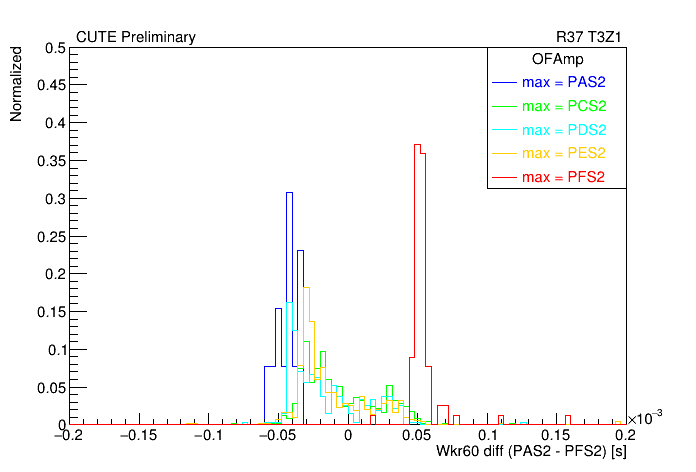

In [23]:
hists = []
wr = 'r60'
side = 2
hists.append(max_channel('PAS%d'%(side),wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS%d'%(side),wr,side=side))
hists.append(max_channel('PDS%d'%(side),wr,side=side))
hists.append(max_channel('PES%d'%(side),wr,side=side))
hists.append(max_channel('PFS%d'%(side),wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    #hist.GetXaxis().SetRangeUser(-0.1e-3, 0.1e-3)
    hist.GetYaxis().SetRangeUser(0,0.5)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


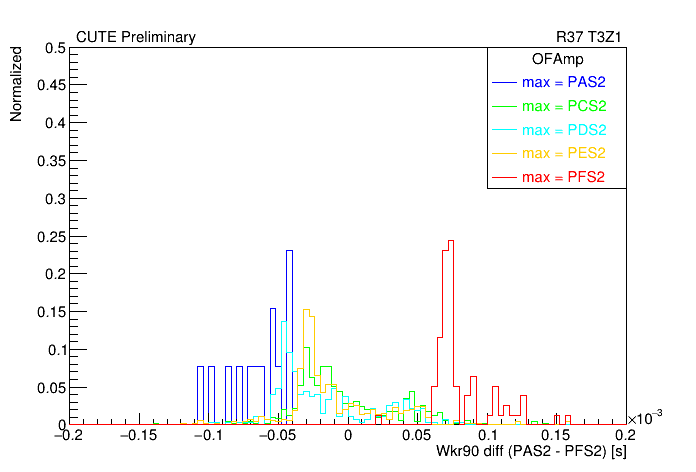

In [24]:
hists = []
wr = 'r90'
side = 2
hists.append(max_channel('PAS%d'%(side),wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel('PCS%d'%(side),wr,side=side))
hists.append(max_channel('PDS%d'%(side),wr,side=side))
hists.append(max_channel('PES%d'%(side),wr,side=side))
hists.append(max_channel('PFS%d'%(side),wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    #hist.GetXaxis().SetRangeUser(-0.1e-3, 0.1e-3)
    hist.GetYaxis().SetRangeUser(0,0.5)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


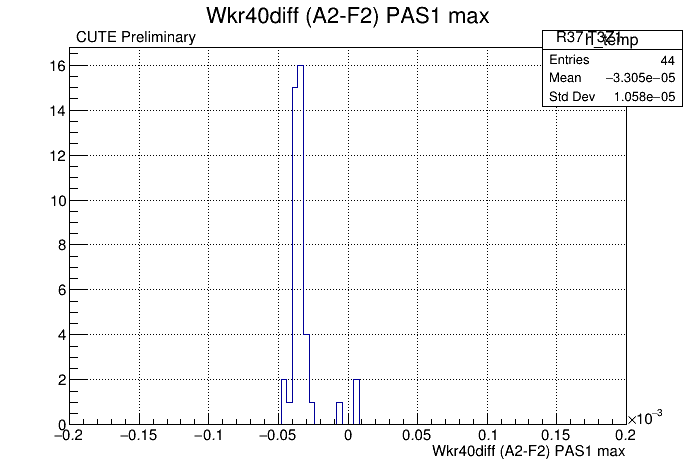

In [50]:
h_temp = max_channel('PAS1','r40')



can = rt.TCanvas()
h_temp.Draw()


textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_temp (Potential memory leak).


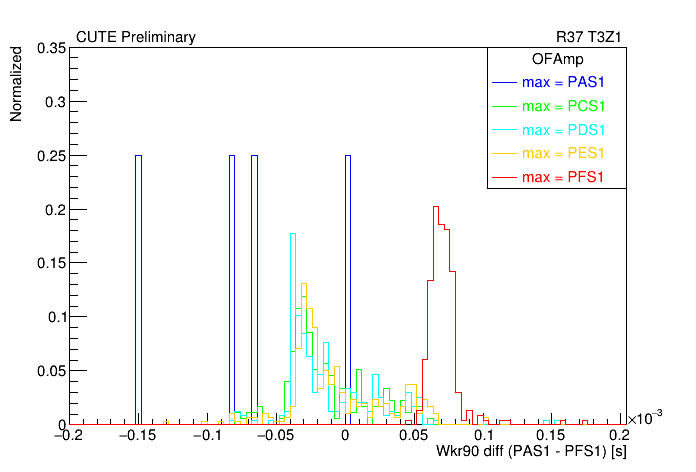

In [21]:
hists = []
wr = 'r90'
side = 1
hists.append(max_channel_asym_cut('PAS1',wr,side=side))
#hists.append(max_channel('PBS1','r40'))
hists.append(max_channel_asym_cut('PCS1',wr,side=side))
hists.append(max_channel_asym_cut('PDS1',wr,side=side))
hists.append(max_channel_asym_cut('PES1',wr,side=side))
hists.append(max_channel_asym_cut('PFS1',wr,side=side))

line_color = [rt.kBlue, rt.kGreen, rt.kCyan, rt.kOrange, rt.kRed, rt.kMagenta]
line_style = [1, 1, 1, 1, 1, 1]
line_width = [1, 1, 1, 1, 1, 1]
#ltext = ['max = PAS1','max = PBS1','max = PCS1','max = PDS1','max = PES1','max = PFS1']
ltext = ['max = PAS%d'%(side),'max = PCS%d'%(side),'max = PDS%d'%(side),'max = PES%d'%(side),'max = PFS%d'%(side)]
legend = rt.TLegend(0.7,0.9,0.9,0.60)
legend.SetTextSize(0.035)
legend.SetHeader('OFAmp','C')
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    if(hist.Integral() != 0):
        hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.GetXaxis().SetRangeUser(-0.2e-3, 0.2e-3)
    hist.GetYaxis().SetRangeUser(0,0.35)
    #hist.Rebin(4)
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Wk%s diff (PAS%s - PFS%d) [s]'%(wr,side,side))
    hist.GetYaxis().SetTitle('Normalized')
    if(i == 0):
        #hist.SetTitle('160 eV line')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy(1)
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')


legend.Draw()
can.Draw()   

In [36]:
Wk['r20'].keys()

dict_keys(['PT', 'PAS1', 'PBS1', 'PCS1', 'PDS1', 'PES1', 'PFS1', 'PAS2', 'PBS2', 'PCS2', 'PDS2', 'PES2', 'PFS2'])

In [41]:
WKr20['23231220_012745']

{'PT': array([-9.99999000e+05,  4.39972097e-02, -9.99999000e+05, ...,
        -9.99999000e+05, -9.99999000e+05, -9.99999000e+05]),
 'PAS1': array([-9.99999000e+05,  3.26393257e-02, -9.99999000e+05, ...,
        -9.99999000e+05, -9.99999000e+05, -9.99999000e+05]),
 'PBS1': array([-9.99999000e+05,  2.65888196e-02, -9.99999000e+05, ...,
        -9.99999000e+05, -9.99999000e+05, -9.99999000e+05]),
 'PCS1': array([-9.99999000e+05,  4.81016198e-02, -9.99999000e+05, ...,
        -9.99999000e+05, -9.99999000e+05, -9.99999000e+05]),
 'PDS1': array([-9.99999000e+05,  4.56146835e-02, -9.99999000e+05, ...,
        -9.99999000e+05, -9.99999000e+05, -9.99999000e+05]),
 'PES1': array([-9.9999900e+05,  3.1947052e-02, -9.9999900e+05, ...,
        -9.9999900e+05, -9.9999900e+05, -9.9999900e+05]),
 'PFS1': array([-9.9999900e+05,  5.1234206e-02, -9.9999900e+05, ...,
        -9.9999900e+05, -9.9999900e+05, -9.9999900e+05]),
 'PAS2': array([-9.99999000e+05,  4.39945589e-02, -9.99999000e+05, ...,
        -9.

In [19]:
idx = 0
key = series[idx]
chan = 'PT'
tot = 0
for idx, key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    mask = mask & (max_amp[key] == 'PBS1')
    tot += (mask.sum())
print(tot)

1


# Wkr diff (PAS1 - PFS1)  more positive = PFS1 max --> More towards the bulk
# Wkr diff (PAS1 - PFS1)  more Negative = PAS1 max --> More towards the edge

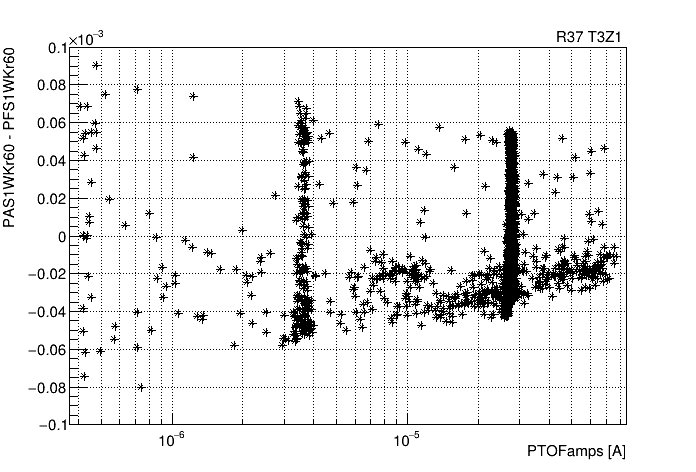

In [108]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,OFamps[key][chan][mask])
    y = np.append(y,WKr60[key]['PAS2'][mask] - WKr60[key]['PFS2'][mask])
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(x),(y))
gr.GetYaxis().SetTitle('PAS1WKr60 - PFS1WKr60')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetXaxis().SetTitle('PTOFamps [A]')

gr.Draw('AP*')

can.SetLogx()

#gr.GetYaxis().SetRangeUser(0.0256,0.0258)
gr.GetYaxis().SetRangeUser(-0.0001,0.0001)

# l0 = rt.TLine(0.35e-6,0,8e-5,0)
# l0.SetLineColor(rt.kBlue)
# l0.SetLineStyle(2)
# l0.SetLineWidth(2)
# l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
#textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

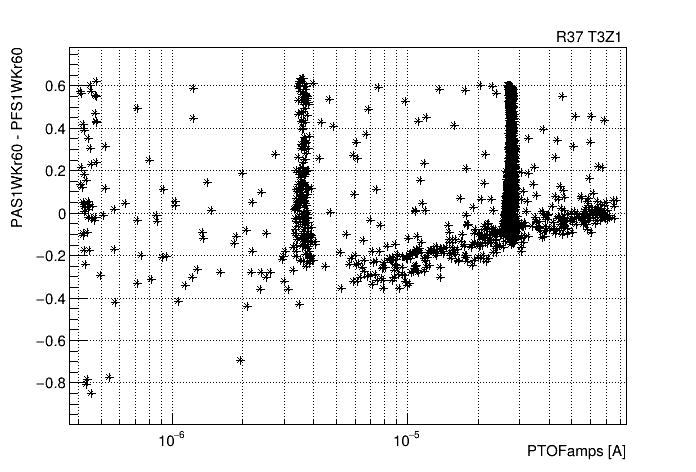

In [116]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = asym_par_reduced
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,OFamps[key][chan][mask])
    min_ = np.minimum(amp_diff_s1[key][mask], amp_diff_s2[key][mask])
    y = np.append(y,min_)
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(x),(y))
gr.GetYaxis().SetTitle('PAS1WKr60 - PFS1WKr60')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetXaxis().SetTitle('PTOFamps [A]')

gr.Draw('AP*')

can.SetLogx()

#gr.GetYaxis().SetRangeUser(0.0256,0.0258)
#gr.GetYaxis().SetRangeUser(-0.0001,0.0001)

# l0 = rt.TLine(0.35e-6,0,8e-5,0)
# l0.SetLineColor(rt.kBlue)
# l0.SetLineStyle(2)
# l0.SetLineWidth(2)
# l0.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
#textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

In [90]:
a = [2,3,4,5,6]
b = [4,4,4,4,4]
np.maximum(a,b)

array([4, 4, 4, 5, 6])

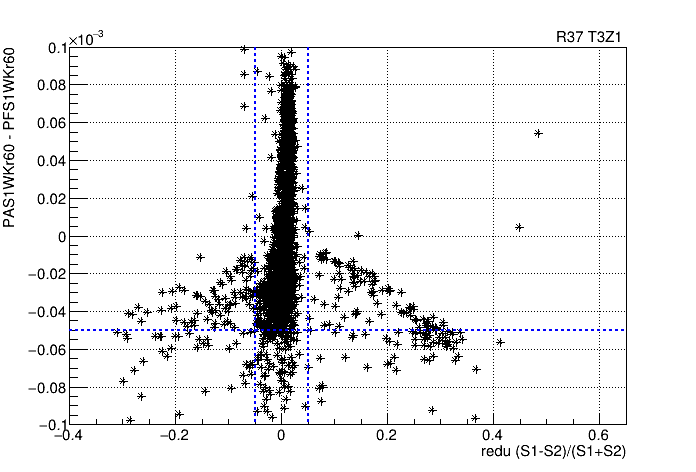

In [26]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = WKr90
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,asym_par_reduced[key][mask])
    max_ = np.minimum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    y = np.append(y,max_)
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(x),(y))
gr.GetYaxis().SetTitle('PAS1WKr60 - PFS1WKr60')
gr.SetTitle('')
#gr.SetTitle('Asymmetry parameter')
gr.GetXaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

#can.SetLogy()

gr.GetXaxis().SetLimits(-0.4,0.65)
gr.GetYaxis().SetRangeUser(-0.0001,0.0001)

l0 = rt.TLine(-0.4, -0.05e-3, 0.65, -0.05e-3)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

lv1 = rt.TLine(-0.05,-1e-4,-0.05,1e-4)
lv1.SetLineColor(rt.kBlue)
lv1.SetLineStyle(2)
lv1.SetLineWidth(2)
lv1.Draw()

lv2 = rt.TLine(0.05,-1e-4,0.05,1e-4)
lv2.SetLineColor(rt.kBlue)
lv2.SetLineStyle(2)
lv2.SetLineWidth(2)
lv2.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
#textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

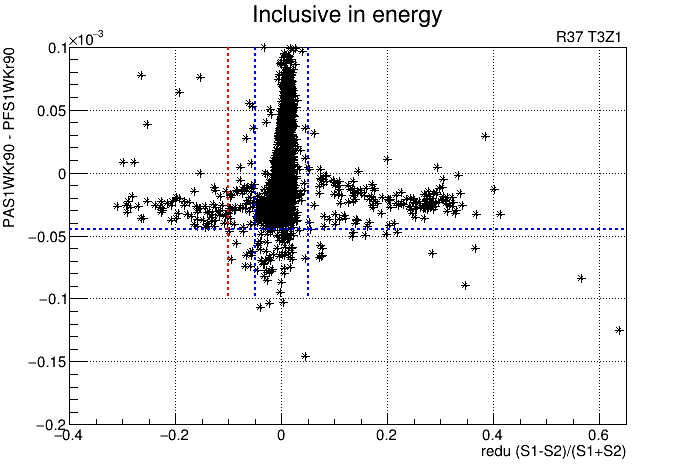

In [66]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = WKr90
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,asym_par_reduced[key][mask])
    max_ = np.maximum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    y = np.append(y,max_)
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(x),(y))
gr.GetYaxis().SetTitle('PAS1WKr90 - PFS1WKr90')
gr.SetTitle('Inclusive in energy')
#gr.SetTitle('Asymmetry parameter')
gr.GetXaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

#can.SetLogy()

gr.GetXaxis().SetLimits(-0.4,0.65)
gr.GetYaxis().SetRangeUser(-0.0002,0.0001)

l0 = rt.TLine(-0.4, -0.045e-3, 0.65, -0.045e-3)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()



lv1 = rt.TLine(-0.05,-1e-4,-0.05,1e-4)
lv1.SetLineColor(rt.kBlue)
lv1.SetLineStyle(2)
lv1.SetLineWidth(2)
lv1.Draw()

ll = rt.TLine(-0.1,-1e-4,-0.1,1e-4)
ll.SetLineColor(rt.kRed)
ll.SetLineStyle(2)
ll.SetLineWidth(2)
ll.Draw()

lv2 = rt.TLine(0.05,-1e-4,0.05,1e-4)
lv2.SetLineColor(rt.kBlue)
lv2.SetLineStyle(2)
lv2.SetLineWidth(2)
lv2.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
#textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

In [ ]:
amp_diff

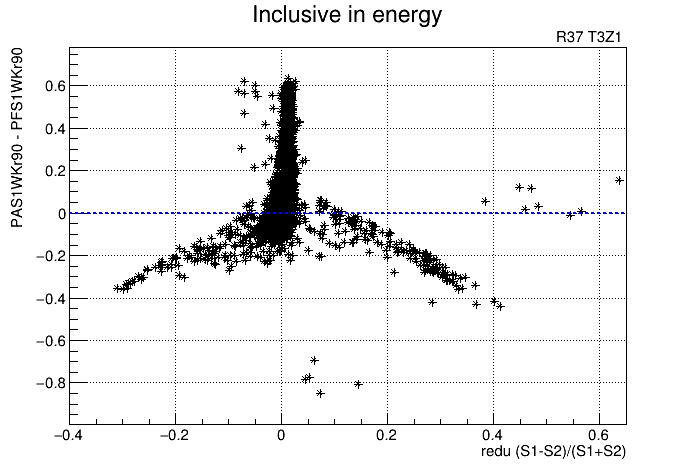

In [114]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = WKr90
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.4e-6) & (OFchiq[key][chan] < 5e5)
    x = np.append(x,asym_par_reduced[key][mask])
    min_ = np.minimum(amp_diff_s1[key][mask], amp_diff_s2[key][mask])
    y = np.append(y,min_)
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(x),(y))
gr.GetYaxis().SetTitle('PAS1WKr90 - PFS1WKr90')
gr.SetTitle('Inclusive in energy')
#gr.SetTitle('Asymmetry parameter')
gr.GetXaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

#can.SetLogy()

gr.GetXaxis().SetLimits(-0.4,0.65)
#gr.GetYaxis().SetRangeUser(-0.0002,0.0001)

l0 = rt.TLine(-0.4, -0.045e-3, 0.65, -0.045e-3)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()



lv1 = rt.TLine(-0.05,-1e-4,-0.05,1e-4)
lv1.SetLineColor(rt.kBlue)
lv1.SetLineStyle(2)
lv1.SetLineWidth(2)
lv1.Draw()

ll = rt.TLine(-0.1,-1e-4,-0.1,1e-4)
ll.SetLineColor(rt.kRed)
ll.SetLineStyle(2)
ll.SetLineWidth(2)
ll.Draw()

lv2 = rt.TLine(0.05,-1e-4,0.05,1e-4)
lv2.SetLineColor(rt.kBlue)
lv2.SetLineStyle(2)
lv2.SetLineWidth(2)
lv2.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
#textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

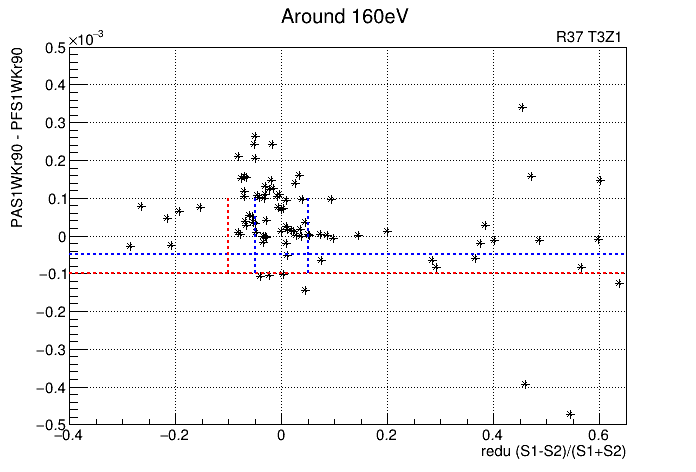

In [76]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = WKr90
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.0) & (OFchiq[key][chan] < 5e5)
    mask = mask & (OFamps[key][chan] > 0.3e-6) & (OFamps[key][chan] < 1.2e-6)
    x = np.append(x,asym_par_reduced[key][mask])
    max_ = np.maximum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    y = np.append(y,max_)
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(x),(y))
gr.GetYaxis().SetTitle('PAS1WKr90 - PFS1WKr90')
gr.SetTitle('Around 160eV')
#gr.SetTitle('Asymmetry parameter')
gr.GetXaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

#can.SetLogy()

gr.GetXaxis().SetLimits(-0.4,0.65)
gr.GetYaxis().SetRangeUser(-0.0005,0.0005)

l0 = rt.TLine(-0.4, -0.05e-3, 0.65, -0.05e-3)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

hh = rt.TLine(-0.4, -0.1e-3, 0.65, -0.1e-3)
hh.SetLineColor(rt.kRed)
hh.SetLineStyle(2)
hh.SetLineWidth(2)
hh.Draw()



lv1 = rt.TLine(-0.05,-1e-4,-0.05,1e-4)
lv1.SetLineColor(rt.kBlue)
lv1.SetLineStyle(2)
lv1.SetLineWidth(2)
lv1.Draw()

ll = rt.TLine(-0.1,-1e-4,-0.1,1e-4)
ll.SetLineColor(rt.kRed)
ll.SetLineStyle(2)
ll.SetLineWidth(2)
ll.Draw()

lv2 = rt.TLine(0.05,-1e-4,0.05,1e-4)
lv2.SetLineColor(rt.kBlue)
lv2.SetLineStyle(2)
lv2.SetLineWidth(2)
lv2.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
#textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

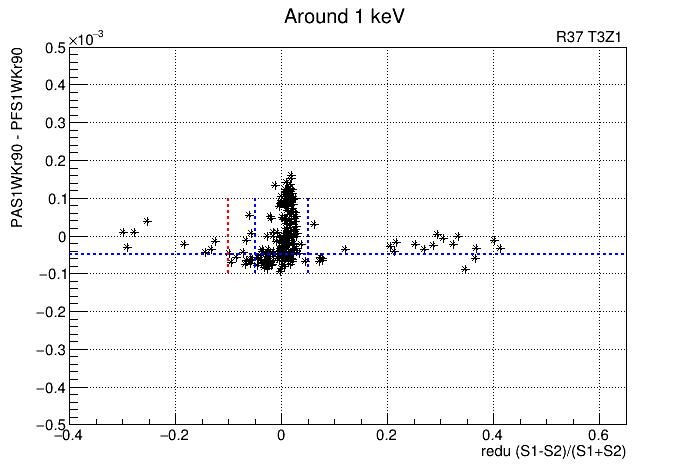

In [75]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = WKr90
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.0) & (OFchiq[key][chan] < 5e5)
    mask = mask & (OFamps[key][chan] > 1e-6) & (OFamps[key][chan] < 6e-6)
    x = np.append(x,asym_par_reduced[key][mask])
    max_ = np.maximum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    y = np.append(y,max_)
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(x),(y))
gr.GetYaxis().SetTitle('PAS1WKr90 - PFS1WKr90')
gr.SetTitle('Around 1 keV')
#gr.SetTitle('Asymmetry parameter')
gr.GetXaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

#can.SetLogy()

gr.GetXaxis().SetLimits(-0.4,0.65)
gr.GetYaxis().SetRangeUser(-0.0005,0.0005)

l0 = rt.TLine(-0.4, -0.05e-3, 0.65, -0.05e-3)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()



lv1 = rt.TLine(-0.05,-1e-4,-0.05,1e-4)
lv1.SetLineColor(rt.kBlue)
lv1.SetLineStyle(2)
lv1.SetLineWidth(2)
lv1.Draw()

ll = rt.TLine(-0.1,-1e-4,-0.1,1e-4)
ll.SetLineColor(rt.kRed)
ll.SetLineStyle(2)
ll.SetLineWidth(2)
ll.Draw()

lv2 = rt.TLine(0.05,-1e-4,0.05,1e-4)
lv2.SetLineColor(rt.kBlue)
lv2.SetLineStyle(2)
lv2.SetLineWidth(2)
lv2.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
#textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

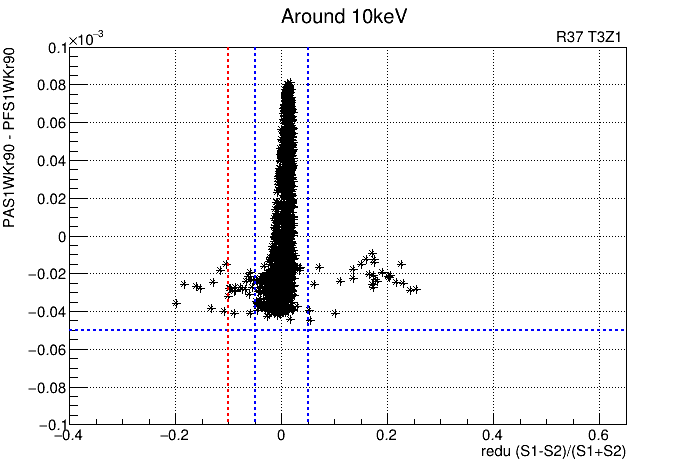

In [74]:
chan = 'PT'
x = np.array([])
y = np.array([])
temp = WKr90
#temp = R2
for idx,key in enumerate(series):
#     if(not(idx == 1)):
#         continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0.0) & (OFchiq[key][chan] < 5e5)
    mask = mask & (OFamps[key][chan] > 20e-6) & (OFamps[key][chan] < 40e-6)
    x = np.append(x,asym_par_reduced[key][mask])
    max_ = np.maximum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    y = np.append(y,max_)
    

# plt.figure()
# #plt.hist(x,bins=100)#,range=[-2,2])
# plt.scatter(y,x)
# plt.yscale('log')
# plt.xscale('log')
# #plt.xlabel('PF - PA [s]')
# plt.title('24 uA< PTOFamp < 32uA')
# plt.show()
# print('std dev = ',np.std(x))

can = rt.TCanvas()
gr = rt.TGraph(len(x),(x),(y))
gr.GetYaxis().SetTitle('PAS1WKr90 - PFS1WKr90')
gr.SetTitle('Around 10keV')
#gr.SetTitle('Asymmetry parameter')
gr.GetXaxis().SetTitle('redu (S1-S2)/(S1+S2)')

gr.Draw('AP*')

#can.SetLogy()

gr.GetXaxis().SetLimits(-0.4,0.65)
gr.GetYaxis().SetRangeUser(-0.0001,0.0001)

l0 = rt.TLine(-0.4, -0.05e-3, 0.65, -0.05e-3)
l0.SetLineColor(rt.kBlue)
l0.SetLineStyle(2)
l0.SetLineWidth(2)
l0.Draw()

# l0 = rt.TLine(-0.4, -0.045e-3, 0.65, -0.045e-3)
# l0.SetLineColor(rt.kBlue)
# l0.SetLineStyle(2)
# l0.SetLineWidth(2)
# l0.Draw()



lv1 = rt.TLine(-0.05,-1e-4,-0.05,1e-4)
lv1.SetLineColor(rt.kBlue)
lv1.SetLineStyle(2)
lv1.SetLineWidth(2)
lv1.Draw()

ll = rt.TLine(-0.1,-1e-4,-0.1,1e-4)
ll.SetLineColor(rt.kRed)
ll.SetLineStyle(2)
ll.SetLineWidth(2)
ll.Draw()

lv2 = rt.TLine(0.05,-1e-4,0.05,1e-4)
lv2.SetLineColor(rt.kBlue)
lv2.SetLineStyle(2)
lv2.SetLineWidth(2)
lv2.Draw()

textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
#textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetGridx()
can.SetGridy()

can.Draw()

# selection cut 
## reduced z-par : abs(asym_par_reduced) < 0.05 AND 
## Maximum of Wkr90difference (A1 - F1) and (A2 - F2) > -0.05e-3

In [21]:
idx = 0
key= series[idx]
WKr40[key]

array([-9.99999000e+05,  3.47415656e-02, -9.99999000e+05, ...,
       -9.99999000e+05, -9.99999000e+05, -9.99999000e+05])

In [17]:
chan = 'PT'

calib = 1.3/3.66 # based on 1 keV line

h_pt_log = rt.TH1F('h_pt_log','h_pt_log',240,-8,-4)
h_pt_log.GetXaxis().SetTitle('log10(PTOFamp [A])')
h_pt_log.GetYaxis().SetTitle('Counts')

h_psum_log = rt.TH1F('h_psum_log','h_psum_log',240,-8,-4)
h_psum_log.GetXaxis().SetTitle('log10(Psum [A])')
h_psum_log.GetYaxis().SetTitle('Counts')

h_psum_corr_log = rt.TH1F('h_psum_corr_log','h_psum_corr_log',240,-8,-4)
h_psum_corr_log.GetXaxis().SetTitle('log10(Psum [A])')
h_psum_corr_log.GetYaxis().SetTitle('Counts')

h_pt_cut_log = rt.TH1F('h_pt_cut_log','h_pt_cut_log',240,-8,-4)
h_pt_cut_log.GetXaxis().SetTitle('log10(Pt with cut [A])')
h_pt_cut_log.GetYaxis().SetTitle('Counts')

h_pt_NotPass_log = rt.TH1F('h_pt_NotPass_log','h_pt_NotPass_log',240,-8,-4)
h_pt_NotPass_log.GetXaxis().SetTitle('log10(Pt[A])')
h_pt_NotPass_log.GetYaxis().SetTitle('Counts')

h_10kev_pt = rt.TH1F('h_10kev_pt','h_10kev_pt',200,20,40)
h_10kev_pt.GetXaxis().SetTitle('Pt (amps)')

h_10kev_psum = rt.TH1F('h_10kev_psum','h_10kev_psum',200,20,40)
h_10kev_psum.GetXaxis().SetTitle('Psum (amps)')

h_10kev_psum_corr = rt.TH1F('h_10kev_psum_corr','h_10kev_psum_corr',200,20,40)
h_10kev_psum_corr.GetXaxis().SetTitle('Psum (amps)')

h_10kev_pt_cut = rt.TH1F('h_10kev_pt_cut','h_10kev_pt_cut',200,20,40)
h_10kev_pt_cut.GetXaxis().SetTitle('Pt (amps)')

h_10kev_cut_kevee = rt.TH1F('h_10kev_cut_kevee','h_10kev_cut_kevee',100, 7, 13)
h_10kev_cut_kevee.GetXaxis().SetTitle('PTOFamps [keVee]')

bins = 200
xmin = 1
xmax = 6
h_1kev_pt = rt.TH1F('h_1kev_pt','h_1kev_pt',bins,xmin,xmax)
h_1kev_pt.GetXaxis().SetTitle('Pt (amps)')

h_1kev_psum = rt.TH1F('h_1kev_psum','h_1kev_psum',bins,xmin,xmax)
h_1kev_psum.GetXaxis().SetTitle('Psum (amps)')

h_1kev_pt_cut = rt.TH1F('h_1kev_pt_cut','h_1kev_pt_cut',bins,xmin,xmax)
h_1kev_pt_cut.GetXaxis().SetTitle('Psum (amps)')

h_1kev_cut_kevee = rt.TH1F('h_1kev_cut_kevee','h_1kev_cut_kevee',100, 0.5, 2.5)
h_1kev_cut_kevee.GetXaxis().SetTitle('PTOFamps [keVee]')

bins = 200
xmin = 0.3
xmax = 1.0
h_160ev_pt = rt.TH1F('h_160ev_pt','h_160ev_pt',bins,xmin,xmax)
h_160ev_pt.GetXaxis().SetTitle('Pt (amps)')

h_160ev_psum = rt.TH1F('h_160ev_psum','h_160ev_psum',bins,xmin,xmax)
h_160ev_psum.GetXaxis().SetTitle('Psum (amps)')

h_160ev_pt_cut = rt.TH1F('h_160ev_pt_cut','h_160ev_pt_cut',bins,xmin,xmax)
h_160ev_pt_cut.GetXaxis().SetTitle('Psum (amps)')

h_160ev_cut_kevee = rt.TH1F('h_160ev_cut_kevee','h_160ev_cut_kevee',100,0.,0.5)
h_160ev_cut_kevee.GetXaxis().SetTitle('PTOFamps [keVee]')

for idx, key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0) & (OFchiq[key][chan] < 5e5)
    ofamps = OFamps[key][chan][mask]
    enum = EventNumber[idx][mask]
    chi2 = OFchiq[key][chan][mask]
    psum = Psum[key][mask]
    psum_corr = Psum_corr[key][mask]
    redu_z = asym_par_reduced[key][mask]
    temp = Wk['r90']
    #max_ = np.maximum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    max_ = np.minimum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    asym = asym_par[key][mask]
    asym_corr = asym_par_corr[key][mask]
    for i,value in enumerate(ofamps):
        
        h_pt_log.Fill(np.log10(value))
        h_psum_log.Fill(np.log10(psum[i]))
        h_psum_corr_log.Fill(np.log10(psum_corr[i]))
        cut = (abs(redu_z[i]) < 0.1) #and (max_[i] > -0.05e-3)
        if(cut):
            h_pt_cut_log.Fill(np.log10(value))
        else:
            h_pt_NotPass_log.Fill(np.log10(value))
        if( value >= 0.3e-6 and value <= 1.2e-6 ):
            h_160ev_pt.Fill(ofamps[i]*1e6)
            h_160ev_psum.Fill(psum_corr[i]*1e6)
            if(cut):
                h_160ev_pt_cut.Fill(value*1e6)
                h_160ev_cut_kevee.Fill(value*1e6*calib)
                    
        
        if( (value>1e-6) and (value<6e-6) ):
            h_1kev_psum.Fill(psum[i]*1e6)
            h_1kev_pt.Fill(ofamps[i]*1e6)
            if(cut):
                h_1kev_pt_cut.Fill(value*1e6)
                h_1kev_cut_kevee.Fill(value*1e6*calib)
        if(value > 20e-6 and value < 40e-6):
            h_10kev_psum_corr.Fill(psum_corr[i]*1e6)
            h_10kev_pt.Fill(ofamps[i]*1e6)
            h_10kev_psum.Fill(psum[i]*1e6)
            if(cut):
                h_10kev_pt_cut.Fill(value*1e6)
                h_10kev_cut_kevee.Fill(value*1e6*calib)
        
                
    print('%s loaded'%(key))
print('all done')

23231220_012745 loaded


/tmp/ipykernel_504213/2613766430.py:86: RuntimeWarning: invalid value encountered in log10
  h_psum_log.Fill(np.log10(psum[i]))
/tmp/ipykernel_504213/2613766430.py:87: RuntimeWarning: invalid value encountered in log10
  h_psum_corr_log.Fill(np.log10(psum_corr[i]))


23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231217_212512 loaded
all done


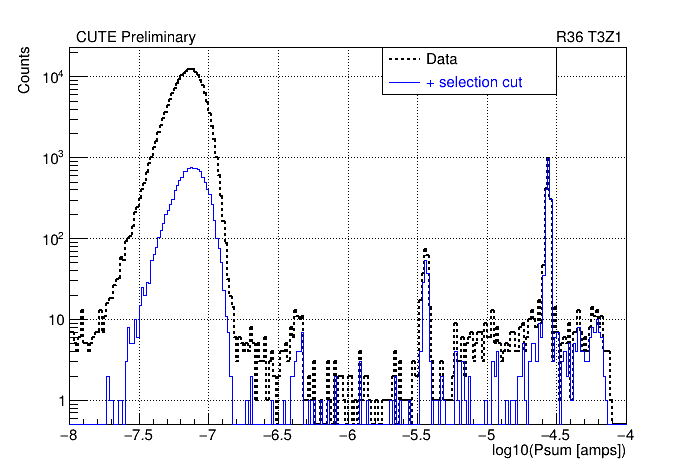

In [33]:
hists = []
hists.append(h_pt_log.Clone())
hists.append(h_pt_cut_log.Clone())

# hists.append(h_psum_log.Clone())
# hists.append(h_psum_corr_log.Clone())
#hists.append(h_psum_cut_log.Clone())

line_color = [rt.kBlack, rt.kBlue, rt.kRed, rt.kCyan, rt.kOrange]
line_style = [2, 1, 1, 1, 1]
line_width = [2, 1, 1, 1, 1]
ltext = ['Data','+ selection cut']
#ltext = ['Data','+ rel calib & reweight','+ z-cut','max = PF']
legend = rt.TLegend(0.55,0.9,0.8,0.8)
legend.SetTextSize(0.035)
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    #hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.SetStats(0)
    hist.SetTitle('')
    hist.GetXaxis().SetTitle('log10(Psum [amps])')
    if(i == 0):
        
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
can.SetLogy()
#can.SetOptStat(0)
legend.Draw()
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R36 T3Z1}')
#can.SetLogy()
can.SetGridx()
can.SetGridy()
can.Draw()   

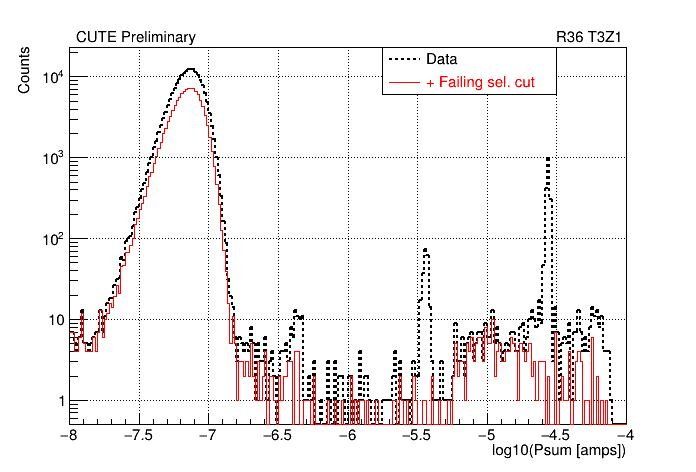

In [22]:
hists = []
hists.append(h_pt_log.Clone())
hists.append(h_pt_NotPass_log.Clone())

# hists.append(h_psum_log.Clone())
# hists.append(h_psum_corr_log.Clone())
#hists.append(h_psum_cut_log.Clone())

line_color = [rt.kBlack, rt.kRed, rt.kRed, rt.kCyan, rt.kOrange]
line_style = [2, 1, 1, 1, 1]
line_width = [2, 1, 1, 1, 1]
ltext = ['Data','+ Failing sel. cut']
#ltext = ['Data','+ rel calib & reweight','+ z-cut','max = PF']
legend = rt.TLegend(0.55,0.9,0.8,0.8)
legend.SetTextSize(0.035)
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    #hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.SetStats(0)
    hist.SetTitle('')
    hist.GetXaxis().SetTitle('log10(Psum [amps])')
    if(i == 0):
        
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
can.SetLogy()
#can.SetOptStat(0)
legend.Draw()
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.035)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R36 T3Z1}')
#can.SetLogy()
can.SetGridx()
can.SetGridy()
can.Draw()   

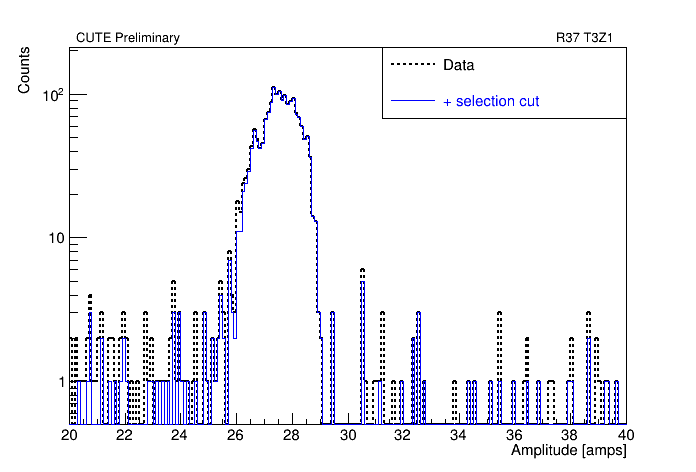

In [37]:
hists = []
hists.append(h_10kev_pt.Clone())
hists.append(h_10kev_pt_cut.Clone())
# hists.append(h_10kev_psum.Clone())
# hists.append(h_10kev_psum_corr.Clone())
#hists.append(h_10kev_psum_cut.Clone())

line_color = [rt.kBlack, rt.kBlue, rt.kRed, rt.kCyan, rt.kOrange]
line_style = [2, 1, 2, 1, 1]
line_width = [2, 1, 1, 1, 1]
ltext = ['Data','+ selection cut']
#ltext = ['Pt','Psum','Psum * new_relative_calib','max = PF']
legend = rt.TLegend(0.55,0.9,0.9,0.75)
#legend = rt.TLegend(0.1,0.9,0.3,0.7)
legend.SetTextSize(0.035)
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    #hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.SetTitle('')
    hist.SetStats(0)
    hist.GetXaxis().SetTitle('Amplitude [amps]')
    #hist.GetYaxis().SetRangeUser(0.5,500)
    hist.GetYaxis().SetTitle('Counts')
    if(i == 0):
        hist.SetTitle('')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
#can.SetLogy()
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.03)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
can.SetLogy()
# can.SetGridx()
# can.SetGridy()
legend.Draw()
can.Draw()   

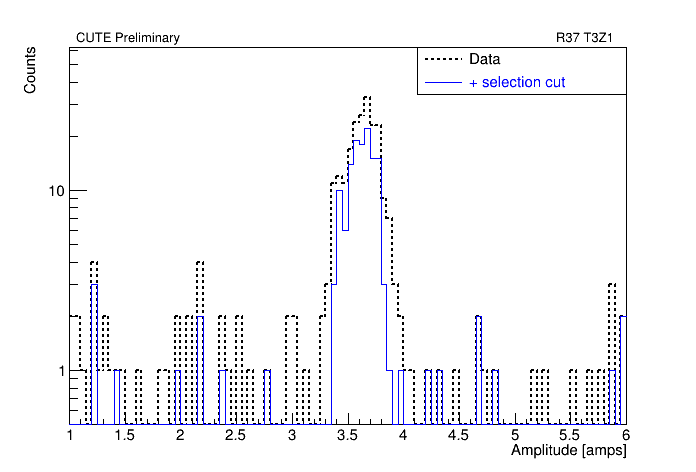

In [38]:
hists = []
hists.append(h_1kev_pt.Clone())
hists.append(h_1kev_pt_cut.Clone())
# hists.append(h_10kev_psum.Clone())
# hists.append(h_10kev_psum_corr.Clone())
#hists.append(h_10kev_psum_cut.Clone())

line_color = [rt.kBlack, rt.kBlue, rt.kRed, rt.kCyan, rt.kOrange]
line_style = [2, 1, 2, 1, 1]
line_width = [2, 1, 1, 1, 1]
ltext = ['Data','+ selection cut']
#ltext = ['Pt','Psum','Psum * new_relative_calib','max = PF']
legend = rt.TLegend(0.6,0.9,0.9,0.8)
#legend = rt.TLegend(0.1,0.9,0.3,0.7)
legend.SetTextSize(0.035)
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    #hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.SetTitle('')
    hist.SetStats(0)
    hist.Rebin(2)
    hist.GetXaxis().SetTitle('Amplitude [amps]')
    #hist.GetYaxis().SetRangeUser(0.5,500)
    hist.GetYaxis().SetTitle('Counts')
    if(i == 0):
        hist.SetTitle('')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
can.SetLogy()
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.03)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
#can.SetLogy()
# can.SetGridx()
# can.SetGridy()
legend.Draw()
can.Draw()   

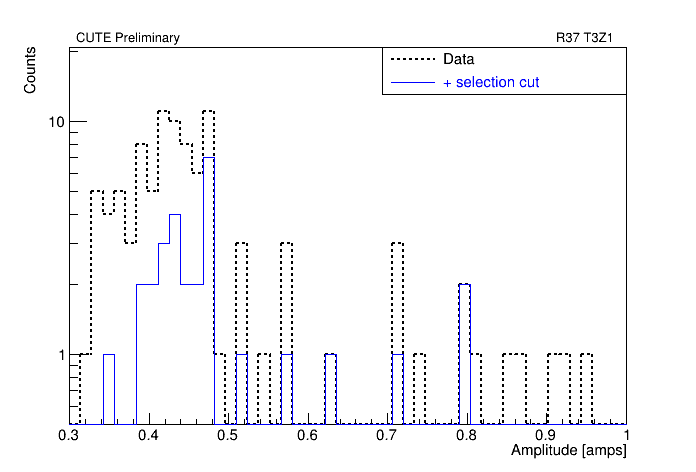

In [39]:
hists = []
hists.append(h_160ev_pt.Clone())
hists.append(h_160ev_pt_cut.Clone())
# hists.append(h_10kev_psum.Clone())
# hists.append(h_10kev_psum_corr.Clone())
#hists.append(h_10kev_psum_cut.Clone())

line_color = [rt.kBlack, rt.kBlue, rt.kRed, rt.kCyan, rt.kOrange]
line_style = [2, 1, 2, 1, 1]
line_width = [2, 1, 1, 1, 1]
ltext = ['Data','+ selection cut']
#ltext = ['Pt','Psum','Psum * new_relative_calib','max = PF']
legend = rt.TLegend(0.55,0.9,0.9,0.8)
#legend = rt.TLegend(0.1,0.9,0.3,0.7)
legend.SetTextSize(0.035)
lentry = []
can = rt.TCanvas()
for i,hist in enumerate(hists):
    #hist.Scale(1.0/hist.Integral())
    hist.SetLineColor(line_color[i])
    hist.SetLineWidth(line_width[i])
    hist.SetLineStyle(line_style[i])
    hist.SetTitle('')
    hist.SetStats(0)
    hist.Rebin(4)
    hist.GetXaxis().SetTitle('Amplitude [amps]')
    #hist.GetYaxis().SetRangeUser(0.5,500)
    hist.GetYaxis().SetTitle('Counts')
    if(i == 0):
        hist.SetTitle('')
        hist.Draw('hist')
        
    else:
        hist.Draw('hist sames')
    lentry.append(legend.AddEntry(hist,ltext[i],'l'))
    lentry[i].SetTextColor(hist.GetLineColor())
can.SetLogy()
#can.SetOptStat(0)
textOnTop = rt.TLatex()
textOnTop.SetTextSize(0.03)
textOnTop.DrawLatexNDC(0.11,0.91,'#bf{CUTE Preliminary}')
textOnTop.DrawLatexNDC(0.8,0.91,'#bf{R37 T3Z1}')
#can.SetLogy()
# can.SetGridx()
# can.SetGridy()
legend.Draw()
can.Draw()   

# checking failing events

In [40]:
fail_10kev = []
fail_1kev = []
fail_160ev = []

for idx, key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0) & (OFchiq[key][chan] < 5e5)
    ofamps = OFamps[key][chan][mask]
    enum = EventNumber[idx][mask]
    chi2 = OFchiq[key][chan][mask]
    psum = Psum[key][mask]
    psum_corr = Psum_corr[key][mask]
    redu_z = asym_par_reduced[key][mask]
    temp = Wk['r90']
    #max_ = np.maximum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    max_ = np.minimum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
    asym = asym_par[key][mask]
    asym_corr = asym_par_corr[key][mask]
    for i,value in enumerate(ofamps):
               
        cut = (abs(redu_z[i]) < 0.05) and (max_[i] > -0.05e-3)
        
        #160 ev    
        if(value >= 0.3e-6 and value <= 0.48e-6 ):
            
            if(not cut):
                fail_160ev.append((key, enum[i]))
                    
        # 1 kev
        if( (value>=3.48e-6) and (value<=3.58e-6) ):
            if(not cut):
                fail_1kev.append((key, enum[i]))
        # 10 kev
        if(value >= 26e-6 and value <= 29e-6):
            
            if(not cut):
                fail_10kev.append((key, enum[i]))
                
        
                
    print('%s loaded'%(key))

23231220_012745 loaded
23231219_184002 loaded
23231219_110331 loaded
23231219_034952 loaded
23231218_223530 loaded
23231218_190035 loaded
23231218_152721 loaded
23231217_212512 loaded


In [42]:
len(fail_160ev)

54

In [49]:
print(fail_160ev[0][0])
ev = []
for i in fail_160ev:
    if(i[0] != '23231219_184002'):
        continue
    ev.append(int(i[1]))
print(ev)

23231220_012745
[41889, 70218, 71040, 180630, 343330, 422941, 440249, 442659, 442778, 442800, 443202, 632241, 812561]


In [83]:
eid = 41889
idx = 1
key = series[idx]
chan = 'PT'
print('series = ',key)
mask = (EventNumber[idx] == eid)
ofamps = OFamps[key][chan][mask]
enum = EventNumber[idx][mask]
chi2 = OFchiq[key][chan][mask]
psum = Psum[key][mask]
psum_corr = Psum_corr[key][mask]
redu_z = asym_par_reduced[key][mask]
temp = Wk['r90']
#max_ = np.maximum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
max_ = np.minimum((temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask]), (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask]))
wrs1 = (temp[key]['PAS1'][mask] - temp[key]['PFS1'][mask])
wrs2 = (temp[key]['PAS2'][mask] - temp[key]['PFS2'][mask])
cut = (abs(redu_z) < 0.05) and (max_ > -0.05e-3)
maxc = max_amp[key][mask]
print('eventNumber = %d'%(EventNumber[idx][mask]))
print('PTOF = %fuA'%(ofamps*1e6))
print('chiq = %f*1e5'%(chi2/1e5))
print('redu = %f'%(redu_z))
print('min() = %f1e-3'%(max_*1e3))
print('\t s1 = %f1e-3'%(wrs1*1e3))
print('\t s2 = %f1e-3'%(wrs2*1e3))
print('max channel = ',maxc)
print('cut = ',cut)

series =  23231219_184002
eventNumber = 41889
PTOF = 0.458332uA
chiq = 0.333683*1e5
redu = 0.004261
min() = -0.1441781e-3
	 s1 = -0.1028331e-3
	 s2 = -0.1441781e-3
max channel =  ['PES1']
cut =  [False]


Warning in <TROOT::Append>: Replacing existing TH1: h_chiq_PTOF (Potential memory leak).


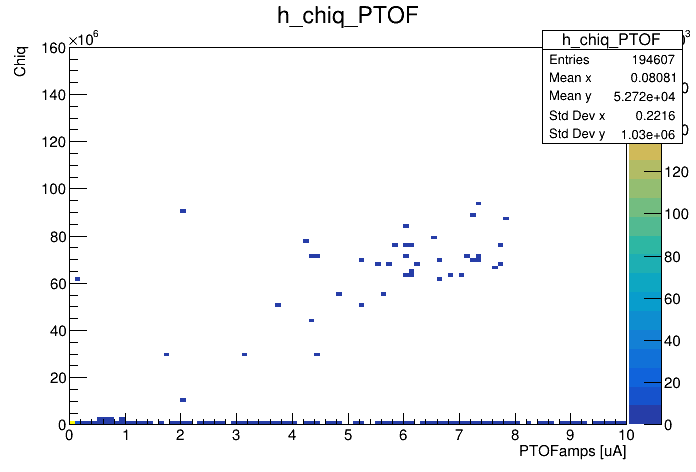

In [220]:
x = np.array([])
y = np.array([])
chan = 'PT'
for idx, key in enumerate(series):
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] > 0)# & (OFchiq[key][chan] < 5e5)
    x = np.append(x,OFamps[key][chan][mask])
    y = np.append(y,OFchiq[key][chan][mask])

#h_chiq_PTOF = rt.TH2F('h_chiq_PTOF','h_chiq_PTOF',100,-8, -4,100,np.logspace(4.3, 9, 101)) 
h_chiq_PTOF = rt.TH2F('h_chiq_PTOF','h_chiq_PTOF',100,0, 10,100,0,160e6) 
h_chiq_PTOF.GetXaxis().SetTitle('PTOFamps [uA]')
h_chiq_PTOF.GetYaxis().SetTitle('Chiq')
#h_chiq_PTOF.SetStats(0)
for i in range(len(x)):
    #h_chiq_PTOF.Fill(np.log10(x[i]),y[i])
    h_chiq_PTOF.Fill((x[i]*1e6),y[i])
can=rt.TCanvas() 
h_chiq_PTOF.Draw('colz')
#can.SetLogy()
can.Draw()

In [219]:
x = np.array([])
y = np.array([])
chan = 'PT'
temp = []
for idx, key in enumerate(series):
    if(key != '23231219_034952'):
        continue
    mask = (TriggerType[idx] == 1) & (TrigDet[idx] == 1) & (OFamps[key][chan] < 20e-6) & (OFchiq[key][chan] > 50e6)
    tx = OFamps[key][chan][mask]
    ty = OFchiq[key][chan][mask]
    enum = EventNumber[idx][mask]
    if(len(enum) != len(tx)):
        print('1. For %s, lengths are not equal'%(key))
        break
    if(len(enum) != len(ty)):
        print('2. For %s, lengths are not equal'%(key))
        break
    for i in range(len(enum)):
        print('%s : %d : %0.2f : %d '%(key, enum[i], tx[i]*1e6, ty[i]/1e6))
        if(key == '23231219_034952'):
            temp.append(int(enum[i]))
        
print(temp)
# for i in range(len(x)):
#     if(x[i] < 20e-6 and y[i] > 50e6):
#         print()
#     #h_chiq_PTOF.Fill(np.log10(x[i]),y[i])
#     h_chiq_PTOF.Fill((x[i]*1e6),y[i])
# can=rt.TCanvas() 
# h_chiq_PTOF.Draw('colz')
# #can.SetLogy()
# can.Draw()

23231219_034952 : 63359 : 6.82 : 63 
23231219_034952 : 432852 : 6.63 : 60 
23231219_034952 : 563850 : 7.61 : 66 
23231219_034952 : 693595 : 7.08 : 63 
23231219_034952 : 722410 : 5.27 : 50 
23231219_034952 : 751519 : 3.77 : 50 
23231219_034952 : 760097 : 7.78 : 67 
23231219_034952 : 781726 : 7.29 : 68 
23231219_034952 : 870474 : 7.37 : 69 
[63359, 432852, 563850, 693595, 722410, 751519, 760097, 781726, 870474]


# Before Feb 13, 2024 